In [1]:
import pandas as pd
import numpy as np
# import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from edgedroid.models.timings import EmpiricalExecutionTimeModel as Empirical, TheoreticalExecutionTimeModel as Theoretical
from collections import deque

neuros = [0.25, 0.5, 0.75]
fade_dist = 8
samples = 500
rng = np.random.default_rng()

In [2]:
rows = deque()
for neuro in neuros:
    emp = Empirical.from_default_data(neuroticism=neuro, transition_fade_distance=fade_dist)
    theo = Theoretical.from_default_data(neuroticism=neuro, transition_fade_distance=fade_dist)

    # get data and distributions
    emp_data = emp._data_views
    theo_dists = theo._dists

    for imp_dur_trans in emp_data.keys():
        emp_samples = rng.choice(emp_data[imp_dur_trans], replace=True, size=samples)
        theo_samples = theo_dists[imp_dur_trans].rvs(size=samples)

        impairment, duration, transition = imp_dur_trans
        for sample in emp_samples:
            rows.append({
                "impairment": impairment,
                "duration": duration,
                "transition": transition,
                "neuroticism": neuro,
                "sample": sample,
                "model": "Empirical"
            })

        for sample in theo_samples:
            rows.append({
                "impairment": impairment,
                "duration": duration,
                "transition": transition,
                "neuroticism": neuro,
                "sample": sample,
                "model": "Theoretical"
            })

sample_df = pd.DataFrame(rows)
sample_df

,impairment,duration,transition,neuroticism,sample,model
0,"[-inf, 1.0)","[0.0, 5.0)",NoTransition,0.25,3.140000,Empirical
1,"[-inf, 1.0)","[0.0, 5.0)",NoTransition,0.25,3.849000,Empirical
2,"[-inf, 1.0)","[0.0, 5.0)",NoTransition,0.25,4.233000,Empirical
3,"[-inf, 1.0)","[0.0, 5.0)",NoTransition,0.25,2.295000,Empirical
4,"[-inf, 1.0)","[0.0, 5.0)",NoTransition,0.25,5.197000,Empirical
...,...,...,...,...,...,...
50995,"[2.0, inf)","[10.0, inf)",NoTransition,0.75,4.600278,Theoretical
50996,"[2.0, inf)","[10.0, inf)",NoTransition,0.75,8.311150,Theoretical
50997,"[2.0, inf)","[10.0, inf)",NoTransition,0.75,3.530161,Theoretical
50998,"[2.0, inf)","[10.0, inf)",NoTransition,0.75,3.512246,Theoretical


Impairment: [-inf, 1.0) | Duration: [0.0, 5.0) | Transition: Higher2Lower


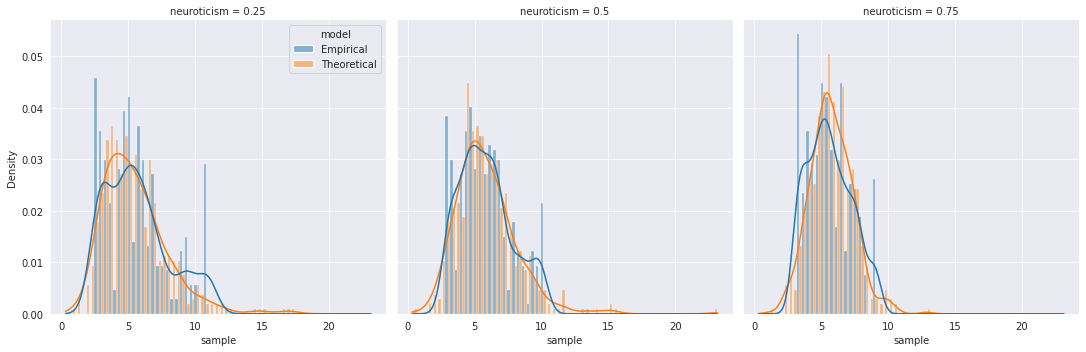

Impairment: [-inf, 1.0) | Duration: [0.0, 5.0) | Transition: NoTransition


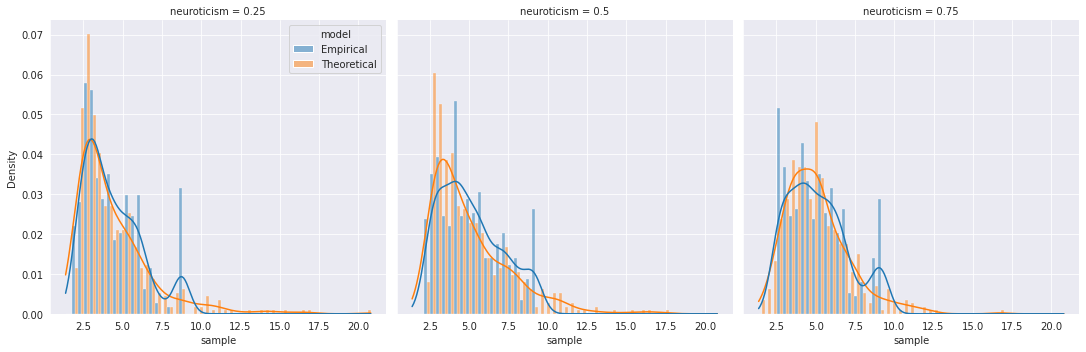

Impairment: [-inf, 1.0) | Duration: [5.0, 10.0) | Transition: Higher2Lower


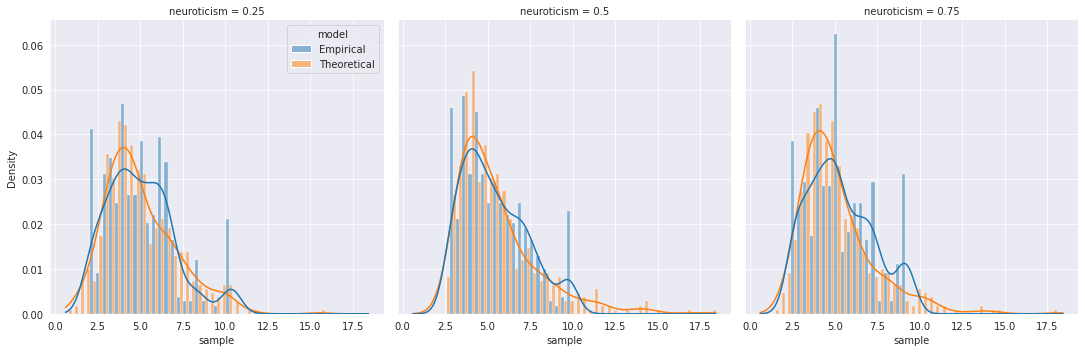

Impairment: [-inf, 1.0) | Duration: [5.0, 10.0) | Transition: NoTransition


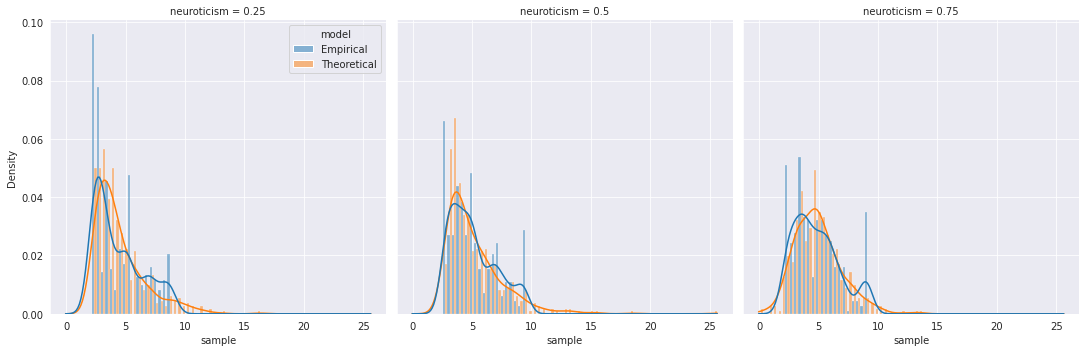

Impairment: [-inf, 1.0) | Duration: [10.0, inf) | Transition: NoTransition


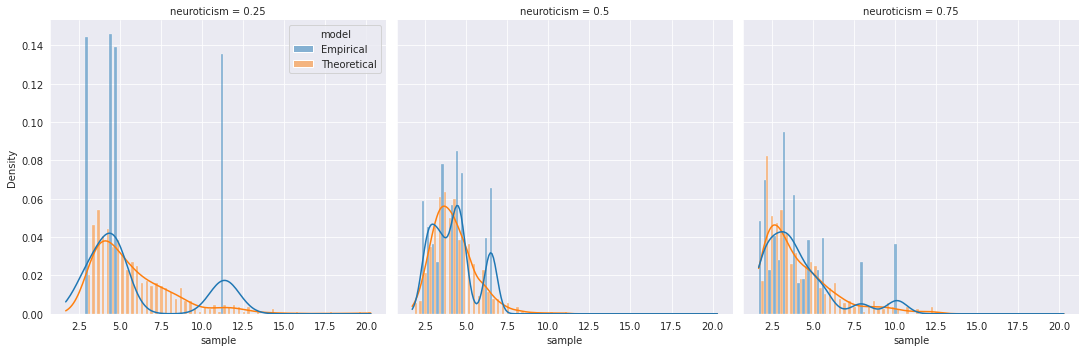

Impairment: [1.0, 2.0) | Duration: [0.0, 5.0) | Transition: Higher2Lower


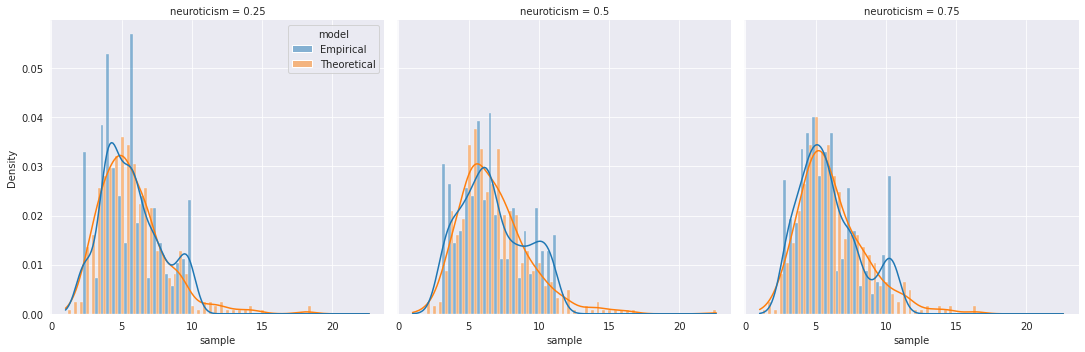

Impairment: [1.0, 2.0) | Duration: [0.0, 5.0) | Transition: Lower2Higher


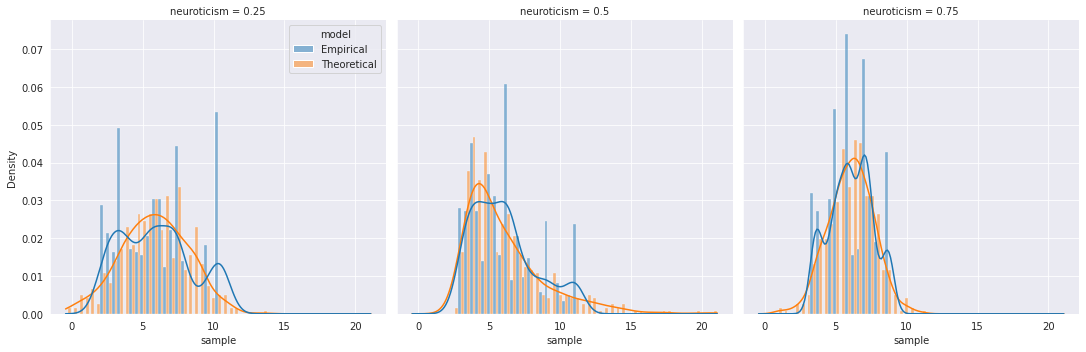

Impairment: [1.0, 2.0) | Duration: [0.0, 5.0) | Transition: NoTransition


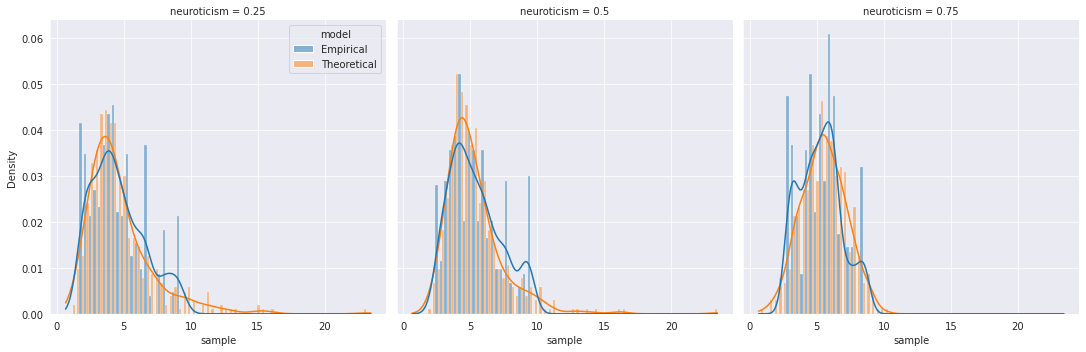

Impairment: [1.0, 2.0) | Duration: [5.0, 10.0) | Transition: Higher2Lower


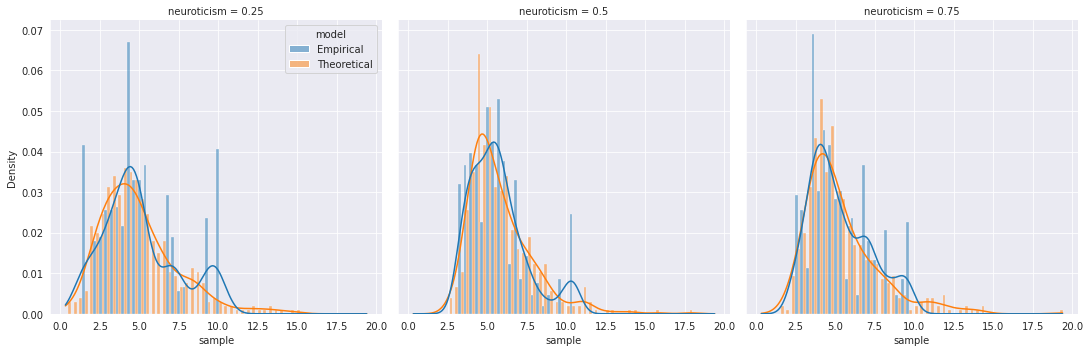

Impairment: [1.0, 2.0) | Duration: [5.0, 10.0) | Transition: Lower2Higher


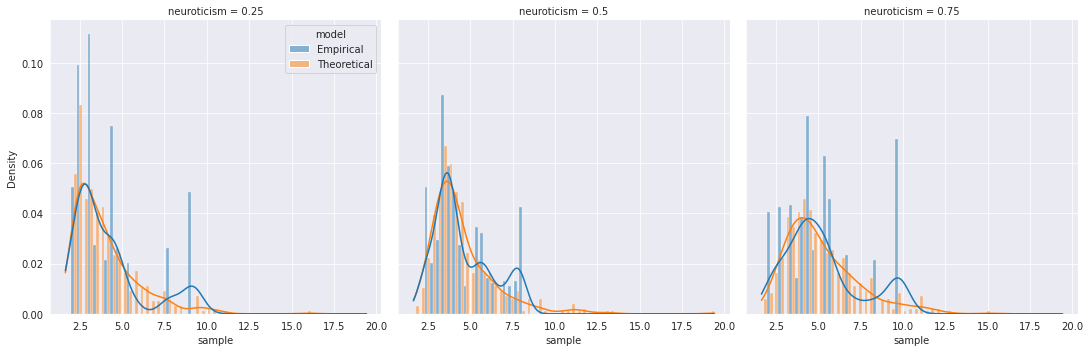

Impairment: [1.0, 2.0) | Duration: [5.0, 10.0) | Transition: NoTransition


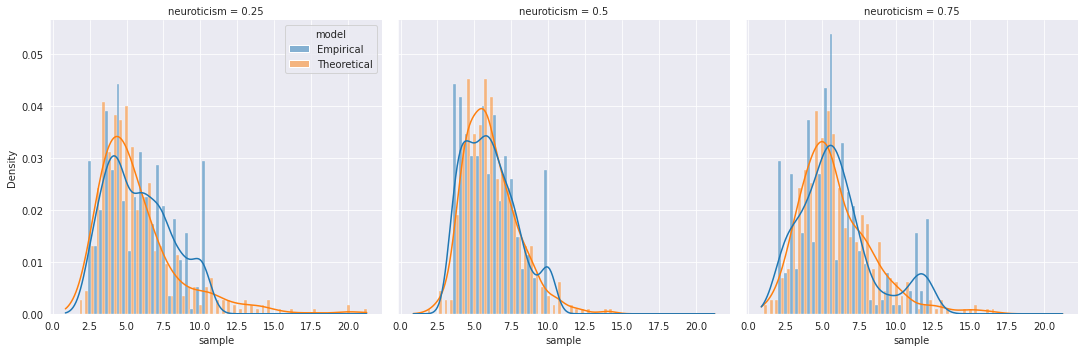

Impairment: [1.0, 2.0) | Duration: [10.0, inf) | Transition: NoTransition


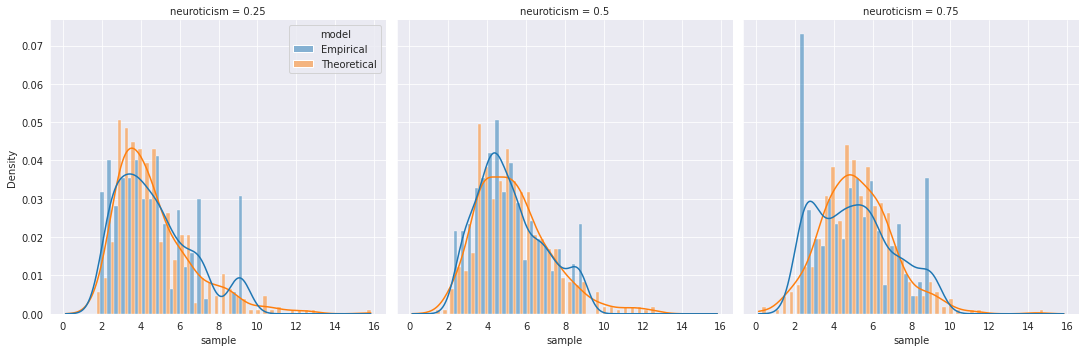

Impairment: [2.0, inf) | Duration: [0.0, 5.0) | Transition: Lower2Higher


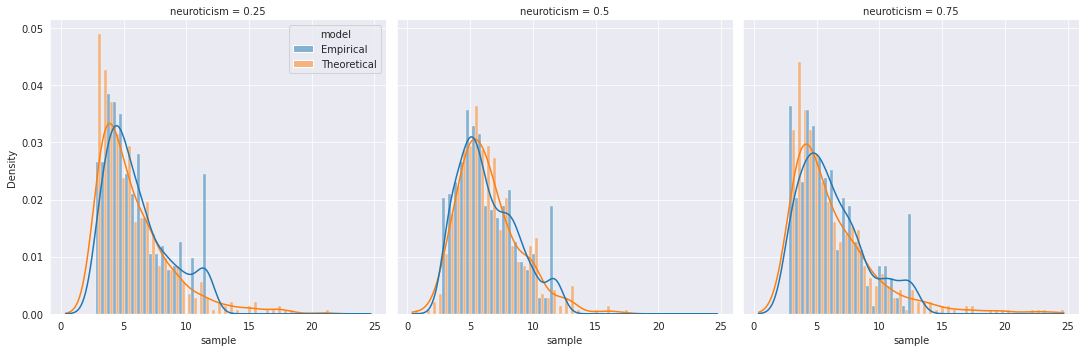

Impairment: [2.0, inf) | Duration: [0.0, 5.0) | Transition: NoTransition


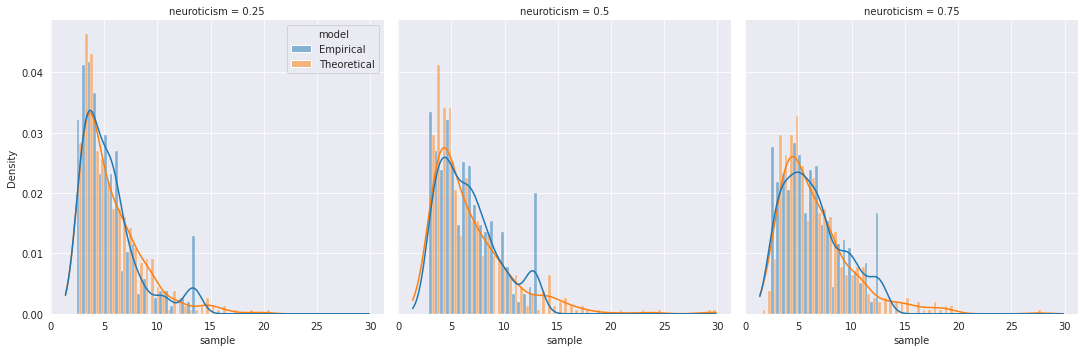

Impairment: [2.0, inf) | Duration: [5.0, 10.0) | Transition: Lower2Higher


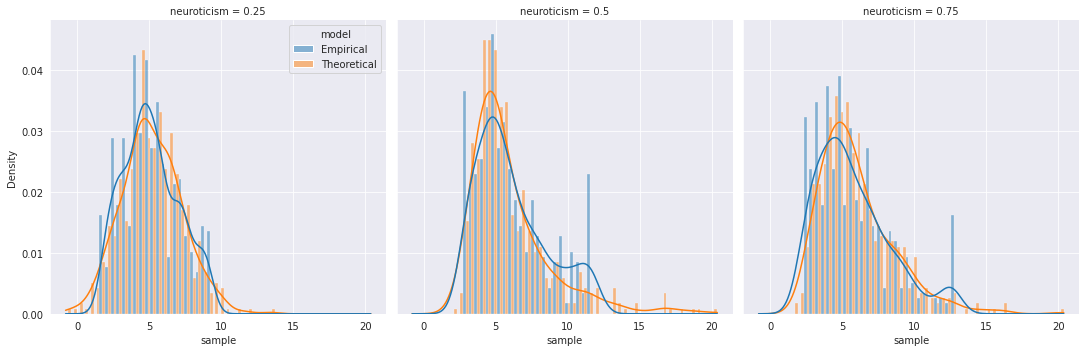

Impairment: [2.0, inf) | Duration: [5.0, 10.0) | Transition: NoTransition


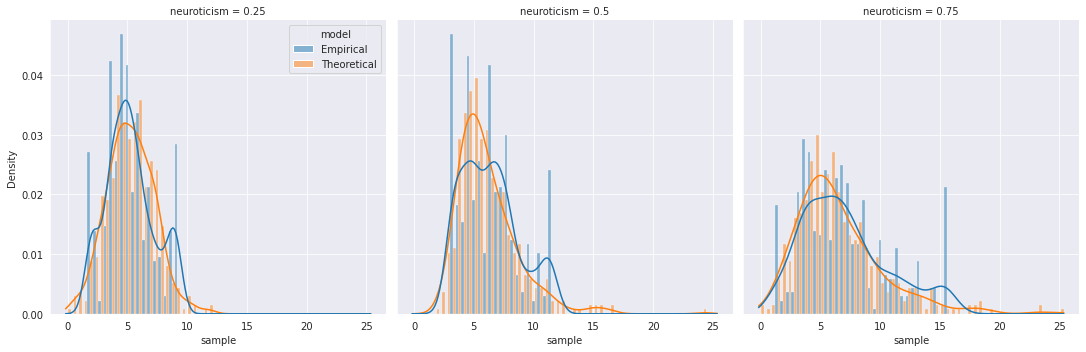

Impairment: [2.0, inf) | Duration: [10.0, inf) | Transition: NoTransition


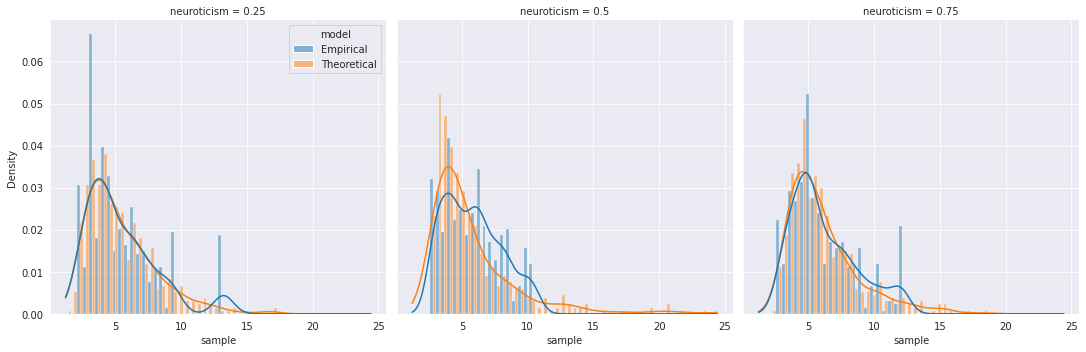

In [3]:
for (imp, dur, trans), df in sample_df.groupby(["impairment", "duration", "transition"]):
    print("Impairment:", imp, "| Duration:", dur, "| Transition:", trans)
    fg = sns.displot(
        kind="hist",
        data=df,
        x="sample",
        hue="model",
        stat="density",
        col="neuroticism",
        col_wrap=4,
        # row="neuroticism",
        multiple="dodge",
        facet_kws=dict(margin_titles=True, legend_out=False,),
        kde=True,
    )
    plt.show()


# df = sample_df.copy()
# df["state"] = df[["impairment", "duration", "transition", "neuroticism"]].apply(lambda row: str(row.to_dict()), axis=1)
#
# fg = sns.displot(
#     kind="hist",
#     data=df,
#     x="sample",
#     col="model",
#     # col_wrap=4,
#     hue="model",
#     row="state",
#     facet_kws=dict(margin_titles=True),
#     # multiple="dodge",
#     stat="density",
# )
# plt.show()
# del df